In [ ]:
# pandas for Data Preprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/FDA Data/insurance_claims.csv')

In [ ]:
#Data Preprocessing & Exploratory Data Analysis
df.shape
df.head()

,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,...,ClaimInvolvedCovers,DamageImportance,ConnectionBetweenParties,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
0,PH006844,V89073,Lawyer,2014-02-16,Motorcycle,75165,0,2,76,31,...,Liability,5,No,81328,0.652447,0,37246.774861,17,0,0.0
1,PH004230,V64262,Teacher,2011-09-14,Car,45809,1,1,97,67,...,Collision,8,No,88724,0.676261,0,32925.571674,19,1,0.0
2,PH004845,V91142,Business,2015-10-11,Truck,42165,0,1,176,76,...,Comprehensive,1,No,68441,0.851770,0,5817.983955,22,0,0.0
3,PH004688,V37222,Engineer,2016-04-12,Car,82232,0,1,151,71,...,Liability,9,No,44767,0.926641,0,48698.053138,22,0,0.0
4,PH006863,V57210,Business,2012-06-27,SUV,85642,0,1,81,28,...,Liability,8,No,46852,0.353562,0,38666.693932,4,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderNumber                10000 non-null  object 
 1   FirstPartyVehicleNumber           10000 non-null  object 
 2   PolicyholderOccupation            10000 non-null  object 
 3   FirstPolicySubscriptionDate       10000 non-null  object 
 4   FirstPartyVehicleType             10000 non-null  object 
 5   PolicyholderPostCode              10000 non-null  int64  
 6   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 7   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 8   FpVehicleAgeMonths                10000 non-null  int64  
 9   PolicyHolderAge                   10000 non-null  int64  
 10  FirstPartyLiability               10000 non-null  float64
 11  ReferenceId                       10000 non-null  object 
 12  Third

**Visualizing Class Distrubition Using Histogram** **bold text**

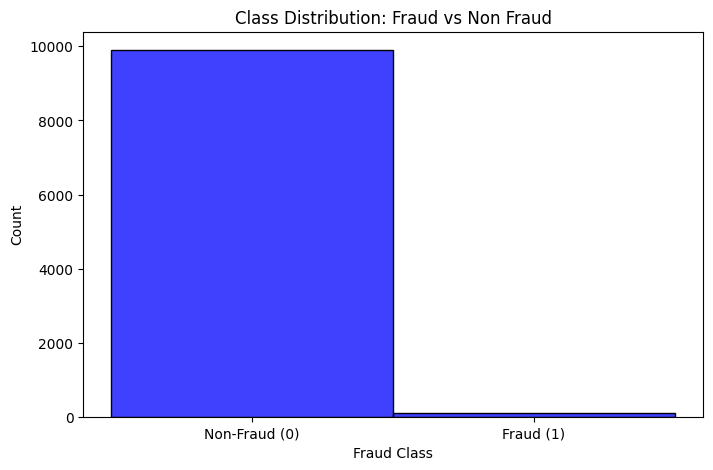

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Fraud"], bins=2, kde=False, discrete=True, color="blue")
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Fraud Class")
plt.ylabel("Count")
plt.title("Class Distribution: Fraud vs Non Fraud")
plt.show()

Dropping Irrelevant Columns

In [ ]:
drop_cols = ["PolicyholderNumber", "FirstPartyVehicleNumber", "ReferenceId", "InsurerNotes", "LossDate", "FirstPolicySubscriptionDate"]
df=df.drop(columns=drop_cols)

**Enconding Categorical Variables & Handling Class Imbalance**

In [ ]:
# Encode categorical variables (Used AI)
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split data into features and target
X = df.drop(columns=["Fraud"])
y = df["Fraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)


**Logistic Regression Model**

In [ ]:
# Scale features to improve model convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(class_weight="balanced", max_iter=1000, solver="saga") #Used AI
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]




**Model Evaluation**

In [ ]:
# Evaluate the model
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Evaluation:
Accuracy: 0.6800
Precision: 0.0079
Recall: 0.2500
F1 Score: 0.0154
AUC-ROC: 0.4033
Confusion Matrix:
[[1355  625]
 [  15    5]]


**Confusion Matrix**

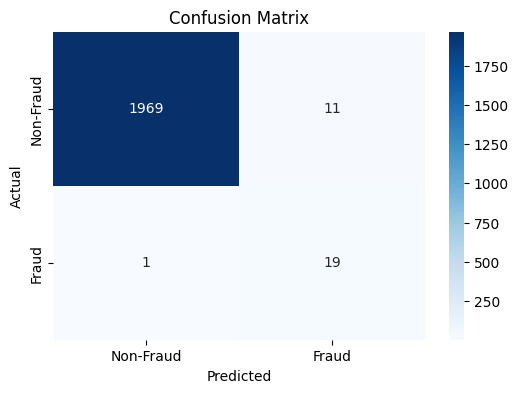

In [ ]:
# Confusion Matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Insights & Recommendations:
Discuss model performance, strengths, and ways to improve fraud detection**